# DynMod, Momentum Balance cases

#### Bernt Lie, University College of Southeast Norway

### Basic import and definitions

In [1]:
from OMPython import ModelicaSystem
import numpy as np
import numpy.random as nr
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
LW1 = 2.5
LW2 = LW1/2
Cb1 = (0.3,0.3,1)
Cb2 = (0.7,0.7,1)
Cg1 = (0,0.6,0)
Cg2 = (0.5,0.8,0.5)
Cr1 = "Red"
Cr2 = (1,0.5,0.5)
LS1 = "solid"
LS2 = "dotted"
figpath = "figs/"

### Incompressible liquid pipe flow

#### Modelica code, file PipeDam

In [2]:
%%writefile MomentumBalanceCases/PipeDam.mo
package PipeDam
  // Package for simulating flow in pipe from dam
  // author: 	Bernt Lie
  //			University of Southeast Norway
  //			September 23, 2015
  //			May 12, 2017
  //
  model SimPipeDam
    // Simulation of flow in pipe from dam
    // author: 	Bernt Lie
    //			University of Southeast Norway
    //			September 23, 2015
	//			May 12, 2017
	//
	// Instantiate model of flow in pipe from dam (pd)
	ModPipeDam pd;
	// Declaring variables
	// -- inputs
	Real _u "Valve input signal, -";
	Real _h "Dam level above pipe inlet, m";
	// -- outputs
	output Real _Vd "Volumetric flow rate, m3/s";
  // Equations
  equation
    // -- input values
	_u = if time < 4 then 0.5 else 0.4;
	_h = 5;
	// -- injecting input functions to model inputs
	pd.u = _u;
	pd.h = _h;
	// -- outputs
	_Vd = pd.Vd;
  end SimPipeDam;
  //
  model ModPipeDam
    // Model of flow in pipe from dam
    // author: 	Bernt Lie
    //			University of Southeast Norway
    //			September 23, 2015
	//			May 12, 2017
	//
	// Constants
	constant Real g = 9.81 "Acceleration of gravity, m/s2";
	// Parameters
	parameter Real Ap = 1.5 "Cross sectional area of pipe, m2";
	parameter Real H = 100 "Level drop of pipe, m";
	parameter Real k = 4e4 "Friction coefficient, N/(m/s)2";
	parameter Real Keo = 2e3 "Valve coefficient, kg/s";
	parameter Real L = 200 "Pipe length, m";
	parameter Real m = rho*Ap*L "Mass of liquid in pipe, kg";
	parameter Real pa = 1.01e5 "Atmospheric pressure, Pa";
	parameter Real rho = 1e3 "Liquid density, kg/m3";
	// Initial state parameters
	parameter Real v0 = 2 "Initial linear velocity of water, m/s";
	parameter Real M0 = m*v0 "Initial momentum of pipe fluid, N.s";
    // Declaring variables
	// -- states
	Real M(start = M0, fixed = true) "Momentum of pipe fluid, N.s";
	// -- auxiliary variables
	Real v "Linear velocity in pipe, m/s";
	Real Vd "Volumetric flow rate, m3/s";
	Real md "Mass flow rate, kg/s";
	Real dpe "Pressure drop over valve, Pa";
	Real pe "Pressure in front of valve, Pa";
	Real p "Pressure at pipe inlet, Pa";
	Real F "Net force, N";
	Real Ff "Friction force, N";
	Real Fg "Gravitational force, N";
	Real Fp "Net pressure force, N";
	// -- input variables
    input Real u "Input signal to valve, -";
	input Real h "Dam level above pipe inlet, m";
  // Equations constituting the model
  equation
	// Differential equations
	der(M) = F;
	// Algebraic equations
	M = m*v;
	Vd = v*Ap;
	md = rho*Vd;
	md = Keo*u*sqrt(dpe/pa);
	dpe = pe-pa;
	//
	F = -Ff+Fg+Fp;
	Ff = k*v*abs(v);
	Fg = m*g*H/L;
	Fp = (p-pe)*Ap;
	p = pa+rho*g*h;
  end ModPipeDam;
  // End package
end PipeDam;

Overwriting MomentumBalanceCases/PipeDam.mo


#### Instantiating model from SimPipeDam

In [3]:
pipe = ModelicaSystem("MomentumBalanceCases/PipeDam.mo","PipeDam.SimPipeDam")

2017-08-07 15:18:51,025 - OMCSession - INFO - OMC Server is up and running at file:///c:/users/bernt_~1/appdata/local/temp/openmodelica.objid.e44dae45eacb4acb8cb7310b16363b48


In [4]:
pipe.setSimulationOptions(stopTime=8,stepSize=1./40)
pipe.simulate()
tm,Vd,u,pe,pa = pipe.getSolutions("time","_Vd","_u","pd.pe","pd.pa")
F,Ff,Fg,Fp,M = pipe.getSolutions("pd.F","pd.Ff","pd.Fg","pd.Fp","pd.M")

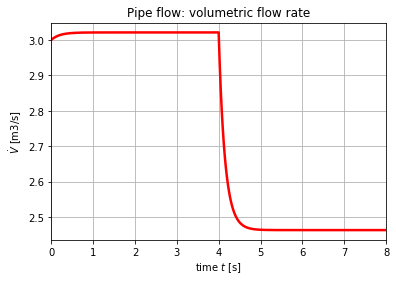

In [5]:
plt.plot(tm,Vd,linewidth=LW1,color=Cr1,label=r"$\dot{V}$")
plt.title(r"Pipe flow: volumetric flow rate")
plt.xlabel(r"time $t$ [s]")
plt.ylabel(r"$\dot{V}$ [m3/s]")
plt.grid()
plt.xlim(0,8)
figfile = "pipeDamSim-1.pdf"
plt.savefig(figpath+figfile)

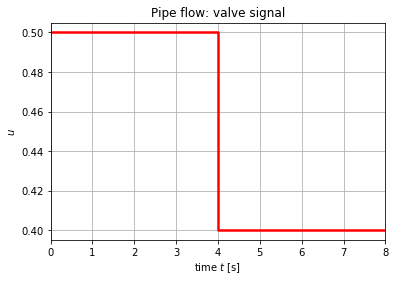

In [6]:
plt.plot(tm,u,linewidth=LW1,color=Cr1,label=r"$\dot{V}$")
plt.title(r"Pipe flow: valve signal")
plt.xlabel(r"time $t$ [s]")
plt.ylabel(r"$u$")
plt.grid()
plt.xlim(0,8)
figfile = "pipeDamSim-3.pdf"
plt.savefig(figpath+figfile)

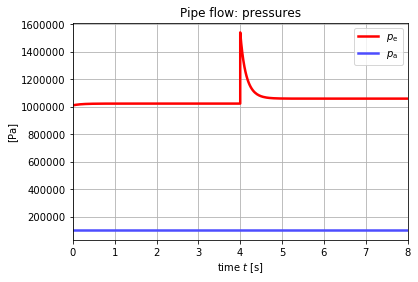

In [7]:
plt.plot(tm,pe,linewidth=LW1,color=Cr1,label=r"$p_{\mathrm{e}}$")
plt.plot(tm,pa,linewidth=LW1,color=Cb1,label=r"$p_{\mathrm{a}}$")
plt.title(r"Pipe flow: pressures")
plt.xlabel(r"time $t$ [s]")
plt.ylabel(r"[Pa]")
plt.grid()
plt.xlim(0,8)
plt.legend()
figfile = "pipeDamSim-2.pdf"
plt.savefig(figpath+figfile)

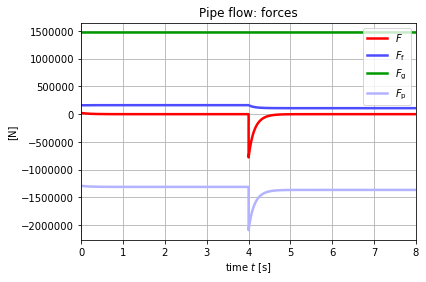

In [8]:
plt.plot(tm,F,linewidth=LW1,color=Cr1,label=r"$F$")
plt.plot(tm,Ff,linewidth=LW1,color=Cb1,label=r"$F_{\mathrm{f}}$")
plt.plot(tm,Fg,linewidth=LW1,color=Cg1,label=r"$F_{\mathrm{g}}$")
plt.plot(tm,Fp,linewidth=LW1,color=Cb2,label=r"$F_{\mathrm{p}}$")
plt.title(r"Pipe flow: forces")
plt.xlabel(r"time $t$ [s]")
plt.ylabel(r"[N]")
plt.grid()
plt.xlim(0,8)
plt.legend()
figfile = "pipeDamSim-4.pdf"
plt.savefig(figpath+figfile)

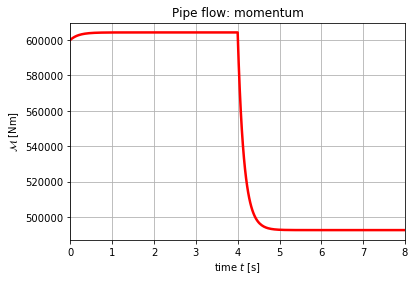

In [9]:
plt.plot(tm,M,linewidth=LW1,color=Cr1,label=r"$\cal{M}$")
plt.title(r"Pipe flow: momentum")
plt.xlabel(r"time $t$ [s]")
plt.ylabel(r"$\cal{M}$ [Nm]")
plt.grid()
plt.xlim(0,8)
figfile = "pipeDamSim-5.pdf"
plt.savefig(figpath+figfile)

### Two tank + basin and pump

#### Modelica code, file PipeTwoTank

In [10]:
%%writefile MomentumBalanceCases/PipeTwoTank.mo
package PipeTwoTank
  // Package for simulating two tank system with basin and pump/pipe
  // author: 	Bernt Lie
  //			University of Southeast Norway
  //			September 23, 2015
  //			May 12, 2017
  //
  model SimPipeTwoTank
    // Simulation of two tank system with basin and pump/pipe
    // author: 	Bernt Lie
    //			University of Southeast Norway
    //			September 23, 2015
	//			May 12, 2017
	//
	// Instantiate model of pipe with two tanks (p2t)
	ModPipeTwoTank p2t;
	// Declaring variables
	// -- inputs
	Real _u "Pump input signal, -";
	// -- outputs
	output Real _hl "Level in lower tank, m";
  // Equations
  equation
    // -- input values
	_u = if time < 400 then 0.5 else 0.52;
	// -- injecting input functions to model inputs
	p2t.u = _u;
	// -- outputs
	_hl = p2t.hl;
  end SimPipeTwoTank;
  //
  model ModPipeTwoTank
    // Model of two tank system with basin and pump/pipe
    // author: 	Bernt Lie
    //			University of Southeast Norway
    //			September 23, 2015
	//			May 12, 2017
	//
	// Constants
	constant Real g = 9.81 "Acceleration of gravity, m/s2";
	// Parameters
	parameter Real Ab = 0.25 "Cross sectional area of basin, m2";
	parameter Real Al = 0.025 "Cross sectional area of lower tank, m2";
	parameter Real Ap = 1/(16*100) "Cross sectional area of pipe, m2";
	parameter Real Au = 0.025 "Cross sectional area of upper tank, m2";
	parameter Real dpp0 = 1.5e4 "Nominal pump pressure increase, Pa";
	parameter Real delpVd = 100 "Pump pressure drop due to flow, Pa";
	parameter Real Vdpo = 1e-4 "Nominal pump flow rate, m3/s";
	parameter Real hsl = 0.25 "Level scaling lower tank, m";
	parameter Real hsu = 0.25 "Level scaling upper tank, m";
	parameter Real H = 1 "Pumping elevation, m";
	parameter Real k = 10 "Friction coefficient, N/(m/s)2";
	parameter Real Kl = 0.1 "Valve coefficient lower tank, kg/s";
	parameter Real Ku = 0.1 "Valve coefficient upper tank, kg/s";
	parameter Real L = 2 "Pipe length, m";
	parameter Real mp = rho*Ap*L "Mass of liquid in pipe, kg";
	parameter Real pa = 1.01e5 "Atmospheric pressure, Pa";
	parameter Real rho = 1e3 "Liquid density, kg/m3";
	// Initial state parameters
	parameter Real hb0 = 0.25 "Initial level of basin, m";
	parameter Real hl0 = 0.2 "Initial level of lower tank, m";
	parameter Real hu0 = 0.2 "Initial level of upper tank, m";
	parameter Real mdp0 = 0.1 "Initial mass flow rate in pipe, kg/s";
	parameter Real Vdp0 = mdp0/rho "Initial volumetric flow rate pipe, m3/s";
	parameter Real vp0 = Vdp0/Ap "Linear velocity in pipe, m/s";
	parameter Real mb0 = rho*Ab*hb0 "Initial mass in basin, kg";
	parameter Real ml0 = rho*Al*hl0 "Initial mass in lower tank, kg";
	parameter Real mu0 = rho*Au*hu0 "Initial mass in upper tank, kg";
	parameter Real Mp0 = mp*vp0 "Initial momentum of pipe fluid, N.s";
    // Declaring variables
	// -- states
	Real mb(start = mb0) "Mass of liquid in basin, kg";
	Real ml(start = ml0) "Mass of liquid in lower tank, kg";
	Real mu(start = mu0) "Mass of liquid in upper tank, kg";
	Real Mp(start = Mp0) "Momentum of pipe fluid, N.s";
	// -- auxiliary variables
	Real mdiu "Influent mass flow rate to upper tank, kg/s";
	Real mdeu "Effluent mass flow rate from upper tank, kg/s";
	Real mdil "Influent mass flow rate to lower tank, kg/s";
	Real mdel "Effluent mass flow rate from lower tank, kg/s";
	Real mdib "Influent mass flow rate to basin, kg/s";
	Real mdeb "Effluent mass flow rate from basin, kg/s";
	Real F "Total force acting on pipe fluid, N";
	Real Vu "Liquid volume of upper tank, m3";
	Real hu "Liquid level of upper tank, m";
	Real Vl "Liquid volume of lower tank, m3";
	Real hl "Liquid level of lower tank, m";
	Real Vb "Liquid volume of basin, m3";
	Real hb "Liquid level of basin, m";
	Real vp "Linear velocity of liquid in pipe, m/s";
	Real mdp "Mass flow rate of liquid in pipe, kg/s";
	Real Vdp "Volumetric flow rate of liquid in pipe, m3/s";
	Real Ff "Friction force acting on liquid in pipe, N";
	Real Fg "Gravitational force acting on liquid in pipe, N";
	Real Fp "Net pressure force acting on liquid in pipe, N";
	Real pp "Pressure in liquid at entrance to pipe/after pump, Pa";
	Real pb "Pressure in liquid at bottom of basin/before pump, Pa";
	Real dpp "Pressure increase over pump, Pa";
	// -- input variables
    input Real u "Input signal to pump, -";
  // Equations constituting the model
  equation
	// Differential equations
	der(mu) = mdiu - mdeu;
	der(ml) = mdil - mdel;
	der(mb) = mdib - mdeb;
	der(Mp) = F;
	// Algebraic equations
	mu = rho*Vu;
	Vu = Au*hu;
	ml = rho*Vl;
	Vl = Al*hl;
	mb = rho*Vb;
	Vb = Ab*hb;
	Mp = mp*vp;
	vp = Vdp/Ap;
	mdp = rho*Vdp;
	//
	mdiu = mdp;
	mdeu = Ku*sqrt(hu/hsu);
	mdil = mdeu;
	mdel = Kl*sqrt(hl/hsl);
	mdib = mdel;
	mdeb = mdp;
	//
	F = -Ff-Fg+Fp;
	Ff = k*vp*abs(vp);
	Fg = mp*g*H/L;
	Fp = (pp-pa)*Ap;
	//
	pp - pb = dpp;
	pb = pa + rho*g*hb;
	dpp = u*(dpp0-delpVd*(Vdp/Vdpo)^2);
  end ModPipeTwoTank;
  // End package
end PipeTwoTank;

Overwriting MomentumBalanceCases/PipeTwoTank.mo


#### Instantiation from SimPipeTwoTank

In [11]:
t2 = ModelicaSystem("MomentumBalanceCases/PipeTwoTank.mo","PipeTwoTank.SimPipeTwoTank")

2017-08-07 15:18:55,996 - OMCSession - INFO - OMC Server is up and running at file:///c:/users/bernt_~1/appdata/local/temp/openmodelica.objid.281096e2660e4684a78546a75b290526


Expected end of text (at char 113), (line:2, col:46)


In [12]:
t2.setSimulationOptions(stopTime=1200,stepSize=30)
t2.simulate()
tm,hL,hu,hb = t2.getSolutions("time","_hl","p2t.hu","p2t.hb")
mdiL,mdiu,mdib,u = t2.getSolutions("p2t.mdil","p2t.mdiu","p2t.mdib","_u")

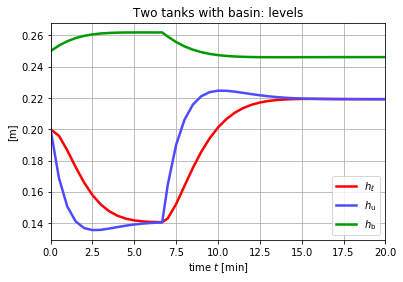

In [13]:
plt.plot(tm/60,hL,linewidth=LW1,color=Cr1,label=r"$h_{\mathrm{\ell}}$")
plt.plot(tm/60,hu,linewidth=LW1,color=Cb1,label=r"$h_{\mathrm{u}}$")
plt.plot(tm/60,hb,linewidth=LW1,color=Cg1,label=r"$h_{\mathrm{b}}$")
plt.title(r"Two tanks with basin: levels")
plt.xlabel(r"time $t$ [min]")
plt.ylabel(r"[m]")
plt.legend()
plt.grid()
plt.xlim(0,20)
figfile = "pipeTwoTankSim-1.pdf"
plt.savefig(figpath+figfile)

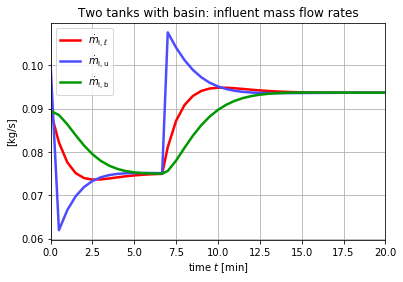

In [14]:
plt.plot(tm/60,mdiL,linewidth=LW1,color=Cr1,label=r"$\dot{m}_{\mathrm{i,\ell}}$")
plt.plot(tm/60,mdiu,linewidth=LW1,color=Cb1,label=r"$\dot{m}_{\mathrm{i,u}}$")
plt.plot(tm/60,mdib,linewidth=LW1,color=Cg1,label=r"$\dot{m}_{\mathrm{i,b}}$")
plt.title(r"Two tanks with basin: influent mass flow rates")
plt.xlabel(r"time $t$ [min]")
plt.ylabel(r"[kg/s]")
plt.legend()
plt.grid()
plt.xlim(0,20)
figfile = "pipeTwoTankSim-2.pdf"
plt.savefig(figpath+figfile)

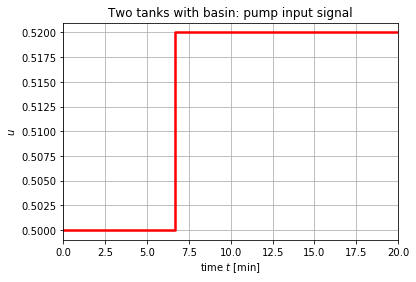

In [15]:
plt.plot(tm/60,u,linewidth=LW1,color=Cr1,label=r"$u$")
plt.title(r"Two tanks with basin: pump input signal")
plt.xlabel(r"time $t$ [min]")
plt.ylabel(r"$u$")
plt.grid()
plt.xlim(0,20)
figfile = "pipeTwoTankSim-3.pdf"
plt.savefig(figpath+figfile)